In [2]:
import argparse
import os
from datetime import date
from datetime import datetime
import datetime as dt
import pandas as pd
import numpy as np
from numpy.random import randint 
import matplotlib.pyplot as plt


KeyboardInterrupt: 

In [ ]:
#this reads data in from the csv file (stored in the same directory as this notebook)
#My table will be a "dataframe" in pandas, which is basically a fancy name for a table with columns and rows. 
MyTable = pd.read_csv("VolumeAndNVbySymbol_wRand.csv")

In [ ]:
#this will give basic statistics for any columns of the data frame whose values are numbers. 
MyTable.describe()

,NV_rand,VOLUME_rand
count,6.432140e+05,6.432140e+05
mean,1.734836e+06,3.222643e+04
std,2.031613e+07,1.849409e+05
min,6.630502e-02,1.000000e+00
25%,6.475344e+03,4.460000e+02
50%,5.821660e+04,3.108000e+03
75%,4.158061e+05,1.445500e+04
max,6.053256e+09,1.736854e+07


In [ ]:
#how to see the types of the various columns:
MyTable.dtypes

Time            object
SYMBOL_NAME     object
NV_rand        float64
VOLUME_rand    float64
dtype: object

In [ ]:
#in this case, though it's not quite clear from the above, it read in the timestamp as a string. It'll be easier to manipulate later as a "datetime" object
# so we can make a new column called "TIME_dt" that is a datetime version of the same thing instead of a string.
# note that the dataframe is big, so doing this will take a little bit of time to run. Several minutes probably. 
MyTable['TIME_dt'] = MyTable.apply(lambda x: (datetime.strptime(x['Time'], '%Y-%m-%d %H:%M:%S')),axis=1)
#the axis=1 here means we will be going row by row and applying our function. The "x" variable refers to the current row we're working on. 
# the datetime.strptime function converts a single string to a datetime object. The %Y-%m ... part specifices what format we expect the string to be in. %Y means "year" for example. 

In [ ]:
#Let's look at the first few rows of the dataframe now. We should see the new TIME_dt column. It'll look the same as Time, but secretly its type is different. 
MyTable.head(10)

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt
0,2021-09-20 09:30:00,NYSE_TAQ::A,2.523433e+07,136317.0,2021-09-20 09:30:00
1,2021-09-20 09:30:00,NYSE_TAQ::AA,3.253425e+07,721069.0,2021-09-20 09:30:00
2,2021-09-20 09:30:00,NYSE_TAQ::AAA,4.796918e+01,2.0,2021-09-20 09:30:00
3,2021-09-20 09:30:00,NYSE_TAQ::AAAU,3.942529e+05,23543.0,2021-09-20 09:30:00
4,2021-09-20 09:30:00,NYSE_TAQ::AAC,3.458813e+03,364.0,2021-09-20 09:30:00
5,2021-09-20 09:30:00,NYSE_TAQ::AACG,2.135053e+04,8576.0,2021-09-20 09:30:00
6,2021-09-20 09:30:00,NYSE_TAQ::AACU,9.582450e+02,103.0,2021-09-20 09:30:00
7,2021-09-20 09:30:00,NYSE_TAQ::AACWS,1.405522e+02,157.0,2021-09-20 09:30:00
8,2021-09-20 09:30:00,NYSE_TAQ::AADI,2.242708e+04,815.0,2021-09-20 09:30:00
9,2021-09-20 09:30:00,NYSE_TAQ::AADR,1.063046e+03,17.0,2021-09-20 09:30:00


In [ ]:
#note that the time column contains data, hour, minute, and seconds. Data was grouped into 10 minute intervals while being generated.
#the timestamp represents the end of each 10-minute interval. In other words, the row for a time of 9:40 represents trading that happened after 9:30 and before 9:40. 
#the SYMBOL_NAME column contains a string that is always prefixed with "NYSE_TAQ::" which is the original database this is pulled from
#what follows "NYSE_TAQ" is the short string that represents the stock "ticker". these can be googled or looked up other places like Yahoo Finance. 
#NV stands for "notional value". This is the sum of the dollar amounts of trades that occurred in the 10-minute interval
#Volume stands for the sum of the number of shares for trades that occurred in that 10-minute interval. 
#each individual trade can have its own price per share, but the NV divided by the Volume will give you the "average" price per share for that time period
#the suffix _rand in the column name indicates that these values have been perturbed a bit by randomness, and so are not precisely accurate, but they are ballpark. 


In [ ]:
#if you want to take data for only one stock and store it as its own dataframe: 
AAPL = MyTable[MyTable['SYMBOL_NAME']=='NYSE_TAQ::AAPL']

In [ ]:
AAPL.head(10)

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt
20,2021-09-20 09:30:00,NYSE_TAQ::AAPL,1.291409e+09,9511778.0,2021-09-20 09:30:00
9708,2021-09-20 09:40:00,NYSE_TAQ::AAPL,5.727062e+08,3979162.0,2021-09-20 09:40:00
18040,2021-09-20 09:50:00,NYSE_TAQ::AAPL,5.916224e+08,3996445.0,2021-09-20 09:50:00
26354,2021-09-20 10:00:00,NYSE_TAQ::AAPL,5.041097e+08,3669794.0,2021-09-20 10:00:00
34596,2021-09-20 10:10:00,NYSE_TAQ::AAPL,5.839089e+08,3876338.0,2021-09-20 10:10:00
42786,2021-09-20 10:20:00,NYSE_TAQ::AAPL,4.909521e+08,3686437.0,2021-09-20 10:20:00
50996,2021-09-20 10:30:00,NYSE_TAQ::AAPL,3.435512e+08,2434383.0,2021-09-20 10:30:00
59221,2021-09-20 10:40:00,NYSE_TAQ::AAPL,3.198363e+08,2213369.0,2021-09-20 10:40:00
67418,2021-09-20 10:50:00,NYSE_TAQ::AAPL,2.229059e+08,1629783.0,2021-09-20 10:50:00
75341,2021-09-20 11:00:00,NYSE_TAQ::AAPL,3.281687e+08,2278232.0,2021-09-20 11:00:00


In [ ]:
#if you want the sum of a column of a dataframe:
AAPL['VOLUME_rand'].sum()

181740957.0

In [ ]:
#if you want the min of a column of a dataframe:
AAPL['VOLUME_rand'].min()

792278.0

In [ ]:
#if you want the max of a column of a dataframe:
AAPL['VOLUME_rand'].max()

9511778.0

In [ ]:
#if you want to copy a dataframe so you can make changes without affecting the original:
AAPL2 = AAPL.copy()

In [ ]:
#if you want to add a column to the dataframe whose values are a pre-built function of another column's values (in the case, the function .hour that picks out the hour of a timestamp)
#note that .hour uses a 24-hour clock:
AAPL2['hour'] = AAPL2.apply(lambda x: x['TIME_dt'].hour, axis=1)


In [ ]:
#to see the effect:
#head has a default of 5 if you don't specify the number of rows you want to see. 
AAPL2.head()

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt,hour
20,2021-09-20 09:30:00,NYSE_TAQ::AAPL,1.291409e+09,9511778.0,2021-09-20 09:30:00,9
9708,2021-09-20 09:40:00,NYSE_TAQ::AAPL,5.727062e+08,3979162.0,2021-09-20 09:40:00,9
18040,2021-09-20 09:50:00,NYSE_TAQ::AAPL,5.916224e+08,3996445.0,2021-09-20 09:50:00,9
26354,2021-09-20 10:00:00,NYSE_TAQ::AAPL,5.041097e+08,3669794.0,2021-09-20 10:00:00,10
34596,2021-09-20 10:10:00,NYSE_TAQ::AAPL,5.839089e+08,3876338.0,2021-09-20 10:10:00,10


In [ ]:
#to get number of rows in a dataframe:
len(MyTable)

643214

In [ ]:
#for some really basic functions of other columns, you can bypass the bulkly .apply syntax:
AAPL2['AVG_PRICE']= AAPL2['NV_rand']/AAPL2['VOLUME_rand']

In [ ]:
#note that the function of x that appears after "lambda x:" can be something you define as a custom function, and can reference multiple fields of the row x. 
#for example:
def silly(a,b):
    return 10*a+b/2

AAPL2['SILLY']= AAPL2.apply(lambda x: silly(x['NV_rand'],x['VOLUME_rand']),axis=1)

In [ ]:
AAPL2.head()

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt,hour,AVG_PRICE,SILLY
20,2021-09-20 09:30:00,NYSE_TAQ::AAPL,1.291409e+09,9511778.0,2021-09-20 09:30:00,9,135.769507,1.291885e+10
9708,2021-09-20 09:40:00,NYSE_TAQ::AAPL,5.727062e+08,3979162.0,2021-09-20 09:40:00,9,143.926332,5.729051e+09
18040,2021-09-20 09:50:00,NYSE_TAQ::AAPL,5.916224e+08,3996445.0,2021-09-20 09:50:00,9,148.037156,5.918222e+09
26354,2021-09-20 10:00:00,NYSE_TAQ::AAPL,5.041097e+08,3669794.0,2021-09-20 10:00:00,10,137.367311,5.042932e+09
34596,2021-09-20 10:10:00,NYSE_TAQ::AAPL,5.839089e+08,3876338.0,2021-09-20 10:10:00,10,150.634165,5.841028e+09


In [ ]:
#now suppose you want to go down to a subset of the columns you've built up:
AAPL2 = AAPL2[['SYMBOL_NAME','NV_rand','VOLUME_rand','TIME_dt','hour']]
AAPL2.head()

,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt,hour
20,NYSE_TAQ::AAPL,1.291409e+09,9511778.0,2021-09-20 09:30:00,9
9708,NYSE_TAQ::AAPL,5.727062e+08,3979162.0,2021-09-20 09:40:00,9
18040,NYSE_TAQ::AAPL,5.916224e+08,3996445.0,2021-09-20 09:50:00,9
26354,NYSE_TAQ::AAPL,5.041097e+08,3669794.0,2021-09-20 10:00:00,10
34596,NYSE_TAQ::AAPL,5.839089e+08,3876338.0,2021-09-20 10:10:00,10


In [ ]:
#you can also do computation where you groupby certain attributes
#for example, let's add up all of the volume for AAPL that happened for each hour value:
#notice that some hours have no volume because the main trading day is 9:30 to 4 pm (aka hour 16). We've included some after hours trading in the dataset, but it was cutoff at 4:20pm in data collection. We omitted any trades before 9:30 that happened in the pre-market. 
AAPL2.groupby(['hour'])['VOLUME_rand'].sum()

#using groupby in this way returns an object which is not quite a new dataframe, it's a more complicated "Groupby" object or something. 
#personally I find working with things after a groupby to be annoying and requiring some type manipulation etc. and a lot of googling to figure out what error messages mean when I do it incorrectly. 
#only mentioning so if you have the same problem, you will know it is not just you! ;) 

hour
9     30547236.0
10    31301725.0
11    20167201.0
12    19146866.0
13    16807426.0
14    19829750.0
15    31588248.0
16    12352505.0
Name: VOLUME_rand, dtype: float64

In [ ]:
MyTable.head()

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt
0,2021-09-20 09:30:00,NYSE_TAQ::A,2.523433e+07,136317.0,2021-09-20 09:30:00
1,2021-09-20 09:30:00,NYSE_TAQ::AA,3.253425e+07,721069.0,2021-09-20 09:30:00
2,2021-09-20 09:30:00,NYSE_TAQ::AAA,4.796918e+01,2.0,2021-09-20 09:30:00
3,2021-09-20 09:30:00,NYSE_TAQ::AAAU,3.942529e+05,23543.0,2021-09-20 09:30:00
4,2021-09-20 09:30:00,NYSE_TAQ::AAC,3.458813e+03,364.0,2021-09-20 09:30:00


In [ ]:
#you can also apply more complex conditions on filtering your data:
MyTable['hour']=MyTable.apply(lambda x: x['TIME_dt'].hour, axis=1)
AAPL_hour9 = MyTable[(MyTable['SYMBOL_NAME']=='NYSE_TAQ::AAPL') & (MyTable['hour']==9)]

In [ ]:
AAPL_hour9.head()

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,TIME_dt,hour
20,2021-09-20 09:30:00,NYSE_TAQ::AAPL,1.291409e+09,9511778.0,2021-09-20 09:30:00,9
9708,2021-09-20 09:40:00,NYSE_TAQ::AAPL,5.727062e+08,3979162.0,2021-09-20 09:40:00,9
18040,2021-09-20 09:50:00,NYSE_TAQ::AAPL,5.916224e+08,3996445.0,2021-09-20 09:50:00,9
327580,2021-09-21 09:30:00,NYSE_TAQ::AAPL,7.802088e+08,5696800.0,2021-09-21 09:30:00,9
336825,2021-09-21 09:40:00,NYSE_TAQ::AAPL,5.123054e+08,3802368.0,2021-09-21 09:40:00,9


**PROJECT STEP 1**

In [ ]:
#a) The number of rows in the sample data set
num_rows_a=MyTable.shape[0] #using shape: The first element of the tuple represents the number of rows.The second element represents the number of columns.
print(num_rows_a)
#or
num_rows_b=len(MyTable) #using len: it returns the number of rows (since each row is treated as an element in the DataFrame).
print(num_rows_b)

643214
643214


In [ ]:
#b) The average value of each numerical column
mean_values = MyTable.mean(numeric_only=True)
print(mean_values)

NV_rand        1.734836e+06
VOLUME_rand    3.222643e+04
hour           1.232811e+01
dtype: float64


In [ ]:
#c)The min and max values of a time-based column
# Get the minimum and maximum values of the 'TIME_dt' column
min_time = MyTable['TIME_dt'].min()
max_time = MyTable['TIME_dt'].max()

# Print the results
print("Minimum time:", min_time)
print("Maximum time:", max_time)


Minimum time: 2021-09-20 09:30:00
Maximum time: 2021-09-21 16:00:00


**PROJECT STEP 2**

In [ ]:
#1)I compute the weighted average of VOLUME_rand with weights NV_rand using average numpy functiion
weighted_avg=np.average(MyTable['VOLUME_rand'],weights=MyTable['NV_rand'])
weighted_avg

932572.8790457677

In [ ]:
#2)
#Calculate total weight
total_weight=MyTable['NV_rand'].sum()

#Define the 5% threshold of the weight
weight_threshold=0.05*total_weight

###LOWEST WEIGHTED AVERAGE
# Sort the Dataframe by 'VOLUME_rand' in ascending order
MyTable_low=MyTable.sort_values('VOLUME_rand')

#Remove approximately 5% of the weight from the bottom
#first I compute the cumulative sum of the NV_rand values (weights) in the sorted DataFrame. This helps track how much total weight has been accumulated at each row.
cumulative_weights_low=MyTable_low['NV_rand'].cumsum()
#Secondly searchsorted is used to find the index where the cumulative sum of the weights first reaches or exceeds 5% of the total weight. This index is then used to trim the dataset.
cut_off_idx_low=cumulative_weights_low.searchsorted(weight_threshold)

#Remove the values up to the cutoff index 
MyTable_low_trimmed=MyTable_low.iloc[cut_off_idx_low]

#Calculate the the lowest weighted average
lowest_weighted_avg=np.average(MyTable_low_trimmed['VOLUME_rand'], weights=MyTable_low_trimmed['NV_rand'])

###HIGHEST WEIGHTED AVERAGE
# Sort the Dataframe by 'VOLUME_rand' in descending order
MyTable_high=MyTable.sort_values('VOLUME_rand', ascending=False)

#Remove approximately 5% of the weight from the bottom
#first I compute the cumulative sum of the NV_rand values (weights) in the sorted DataFrame. This helps track how much total weight has been accumulated at each row.
cumulative_weights_high=MyTable_high['NV_rand'].cumsum()
#Secondly searchsorted is used to find the index where the cumulative sum of the weights first reaches or exceeds 5% of the total weight. This index is then used to trim the dataset.
cut_off_idx_high=cumulative_weights_high.searchsorted(weight_threshold)

#Remove the values up to the cutoff index 
MyTable_high_trimmed=MyTable_high.iloc[cut_off_idx_high]

#Calculate the the lowest weighted average
highest_weighted_avg=np.average(MyTable_high_trimmed['VOLUME_rand'], weights=MyTable_high_trimmed['NV_rand'])

round(lowest_weighted_avg,2), highest_weighted_avg

(10264.0, 4059206.0)

In [ ]:
#3)
#I aggregate by 'SYMBOL_NAME' and compute the weighted average for each symbol
symbol_grouped=MyTable.groupby('SYMBOL_NAME').apply(lambda x: np.average(x['VOLUME_rand'], weights=x['NV_rand']))

#I calculate total NV_rand for each symbol
total_weights_by_symbol=MyTable.groupby('SYMBOL_NAME')['NV_rand'].sum()

#I compute the weighted average of VOLUME_rand over symbols using total NV_rand as the weighted
symbol_weighted_avg=np.average(symbol_grouped, weights=total_weights_by_symbol )

#Compare with weighted_avg

round(weighted_avg,2), round(symbol_weighted_avg,2)

C:\Users\HP\AppData\Local\Temp\ipykernel_22028\714812074.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  symbol_grouped=MyTable.groupby('SYMBOL_NAME').apply(lambda x: np.average(x['VOLUME_rand'], weights=x['NV_rand']))


(932572.88, 932572.88)

As we anticipated both weighted_avg and symbol_weighted_avg yield the same result. This is due to the properties of weighted averages, where the order of aggregation doesn't affect the final result if weights are consistently applied.

The overall weighted average computed in step 1 considers all the rows across all symbols, with each row's NV_rand acting as a weight for its corresponding VOLUME_rand.

In step 3, when we calculate the weighted average for each symbol, and then compute the overall weighted average of these symbol-level averages using the total NV_rand for each symbol as the weight, we are effectively performing the same operation but in two stages (first per symbol, then across symbols).

This is because weighted averages are associative. Whether you compute the weighted average across the entire dataset (step 1) or break it down by symbol and then aggregate it again (step 3), as long as you're using the correct weights at each step, the final result will be the same.








**PROJECT STEP 3**

In [ ]:
# Load the data files for each day
data_days= {}
for i in range(1,6):
    data_days[i]=pd.read_csv(f'Day{i}_Trades_SPY.csv')
#Print the head and the tail for each day
for i, data in data_days.items():
    
    print(f'Head of the data day{i}:')
    print(data.head())
    
    
    print(f'Tail of the data day{i}:')
    print(data.tail())

Head of the data day1:
              Time   PRICE  SIZE EXCHANGE PARTICIPANT_TIME
0  09:30:00.000744  455.69   100        Z  09:30:00.000467
1  09:30:00.000838  455.20   100        K  09:30:00.000457
2  09:30:00.001118  455.86    63        Z  09:30:00.000887
3  09:30:00.001128  455.17   105        Z  09:30:00.000887
4  09:30:00.001228  455.45    61        K  09:30:00.000935
Tail of the data day1:
                   Time   PRICE   SIZE EXCHANGE PARTICIPANT_TIME
342063  16:00:00.287341  458.32      9        T  16:00:00.286994
342064  16:00:00.304377  458.48  20700        T  16:00:00.304028
342065  16:00:00.816675  458.15    400        D  15:59:52.565000
342066  16:00:00.816888  458.76    400        D  15:59:52.565000
342067  16:00:02.511761  458.42    200        D  15:59:54.403000
Head of the data day2:
              Time   PRICE  SIZE EXCHANGE PARTICIPANT_TIME
0  09:30:00.017884  263.32   400        Z  09:30:00.017333
1  09:30:00.017910  263.65   200        K  09:30:00.017333
2  09:30:0

Summary for Day 1
               PRICE          SIZE
count  342068.000000  3.420680e+05
mean      457.230434  1.113355e+02
std         0.627741  2.343928e+03
min       455.010000  1.000000e+00
25%       456.850000  2.000000e+01
50%       457.300000  1.000000e+02
75%       457.680000  1.000000e+02
max       458.840000  1.347466e+06
Total Volume on Day 1: 38084309
Price Range on Day 1: 3.829999999999984


C:\Users\HP\AppData\Local\Temp\ipykernel_22028\2105322555.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour']=pd.to_datetime(data['Time']).dt.hour


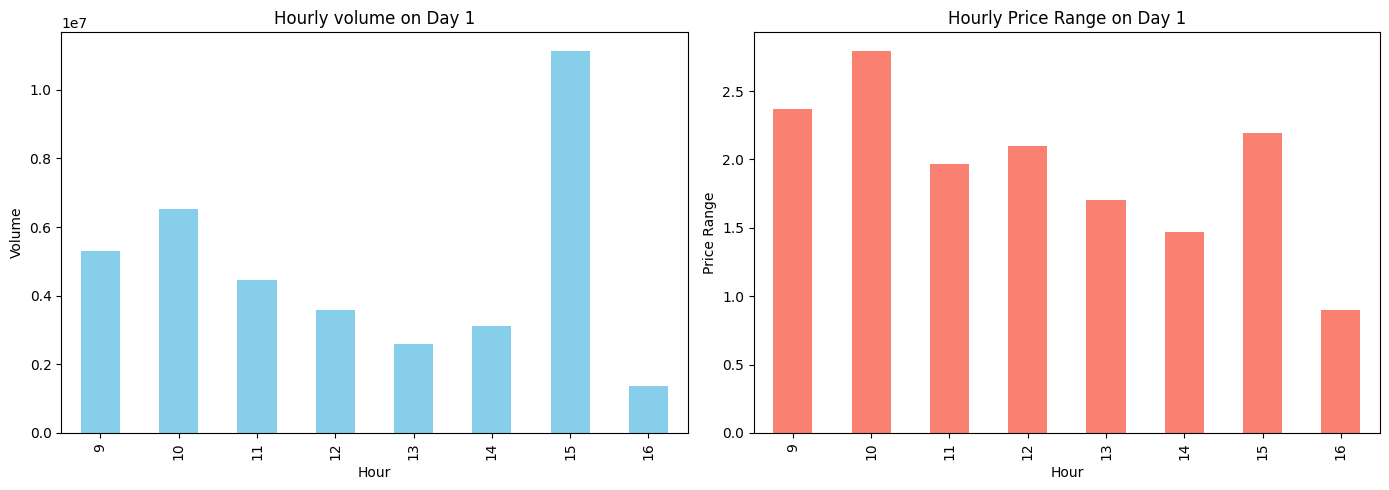


------------------------------------------------

Summary for Day 2
               PRICE          SIZE
count  314071.000000  3.140710e+05
mean      264.302808  2.201456e+02
std         0.507244  2.652188e+03
min       263.140000  1.000000e+00
25%       263.900000  1.000000e+02
50%       264.270000  1.000000e+02
75%       264.670000  2.000000e+02
max       267.260000  1.439916e+06
Total Volume on Day 2: 69141350
Price Range on Day 2: 4.1200000000000045


C:\Users\HP\AppData\Local\Temp\ipykernel_22028\2105322555.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour']=pd.to_datetime(data['Time']).dt.hour


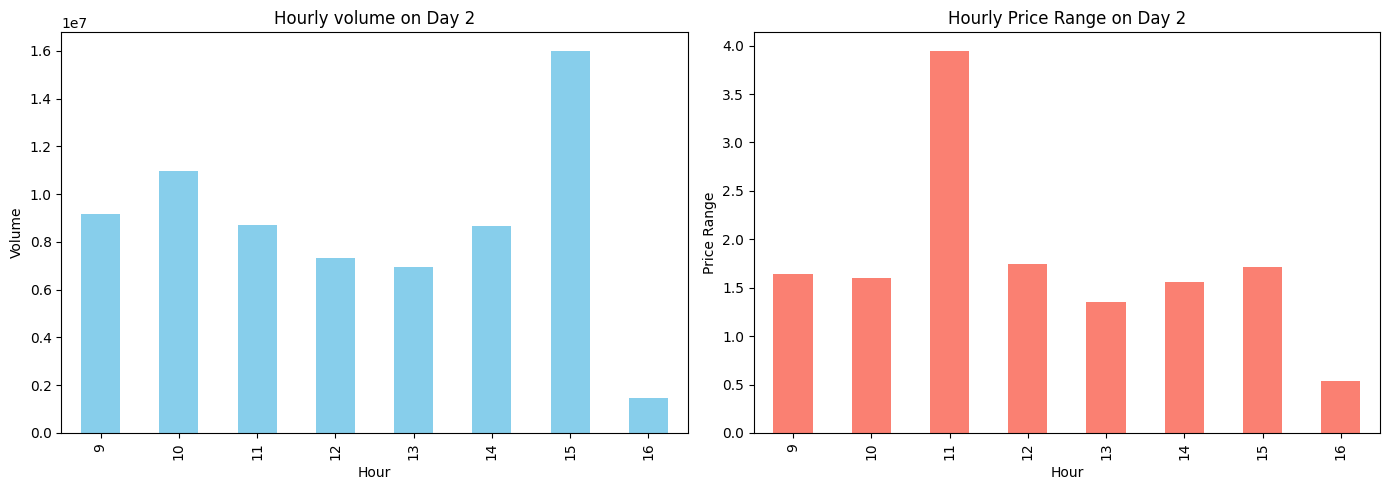


------------------------------------------------

Summary for Day 3
               PRICE          SIZE
count  270851.000000  2.708510e+05
mean      266.171165  2.205162e+02
std         0.411743  3.359572e+03
min       264.800000  1.000000e+00
25%       265.930000  1.000000e+02
50%       266.190000  1.000000e+02
75%       266.440000  2.000000e+02
max       267.370000  1.714626e+06
Total Volume on Day 3: 59727024
Price Range on Day 3: 2.569999999999993


C:\Users\HP\AppData\Local\Temp\ipykernel_22028\2105322555.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour']=pd.to_datetime(data['Time']).dt.hour


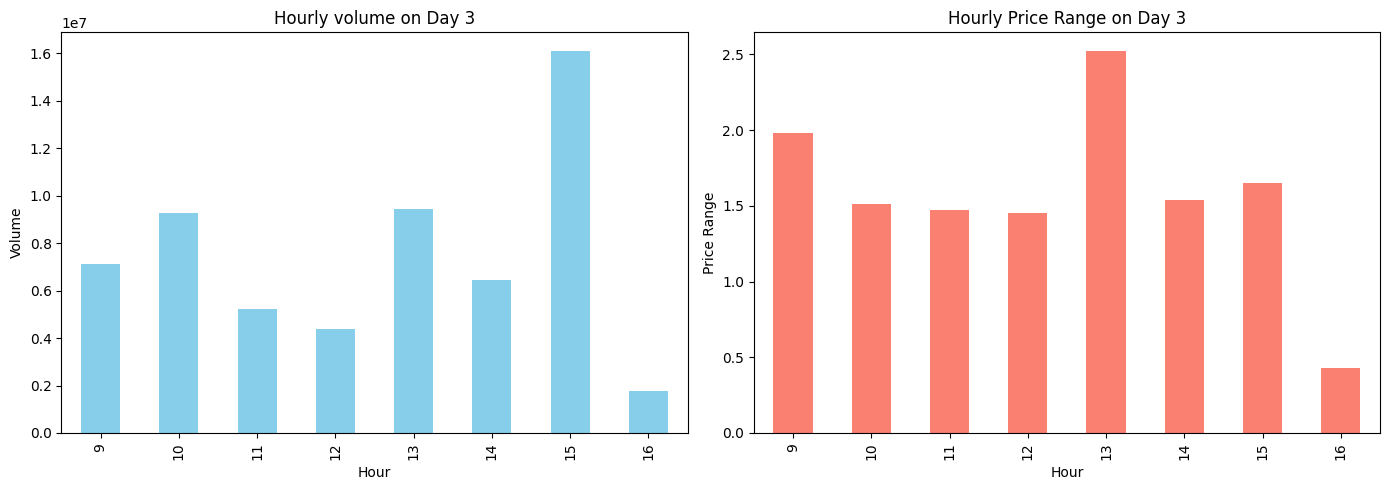


------------------------------------------------

Summary for Day 4
              PRICE          SIZE
count  2.803902e+06  2.803902e+06
mean   2.368660e+02  9.693719e+01
std    4.192842e+00  1.385586e+03
min    2.278100e+02  1.000000e+00
25%    2.332400e+02  1.400000e+01
50%    2.374100e+02  8.500000e+01
75%    2.400500e+02  1.000000e+02
max    2.484900e+02  2.094942e+06
Total Volume on Day 4: 271802390
Price Range on Day 4: 20.680000000000007


C:\Users\HP\AppData\Local\Temp\ipykernel_22028\2105322555.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour']=pd.to_datetime(data['Time']).dt.hour


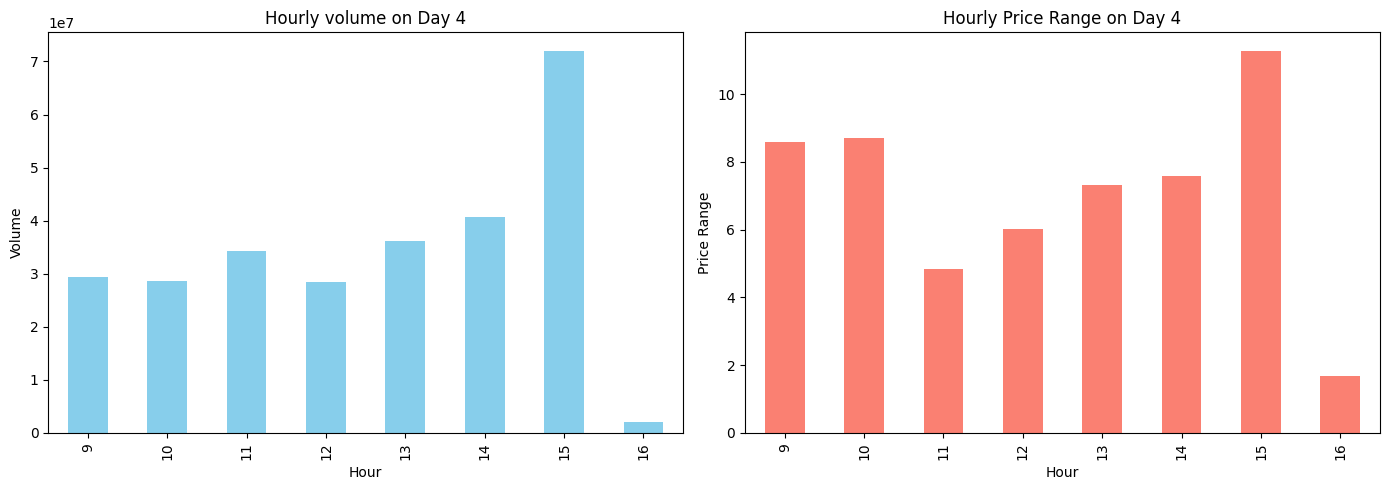


------------------------------------------------

Summary for Day 5
               PRICE          SIZE
count  231404.000000  2.314040e+05
mean      442.078810  1.199671e+02
std         0.392062  2.169778e+03
min       440.880000  1.000000e+00
25%       441.800000  2.000000e+01
50%       442.080000  1.000000e+02
75%       442.360000  1.000000e+02
max       443.220000  1.027179e+06
Total Volume on Day 5: 27760866
Price Range on Day 5: 2.340000000000032


C:\Users\HP\AppData\Local\Temp\ipykernel_22028\2105322555.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour']=pd.to_datetime(data['Time']).dt.hour


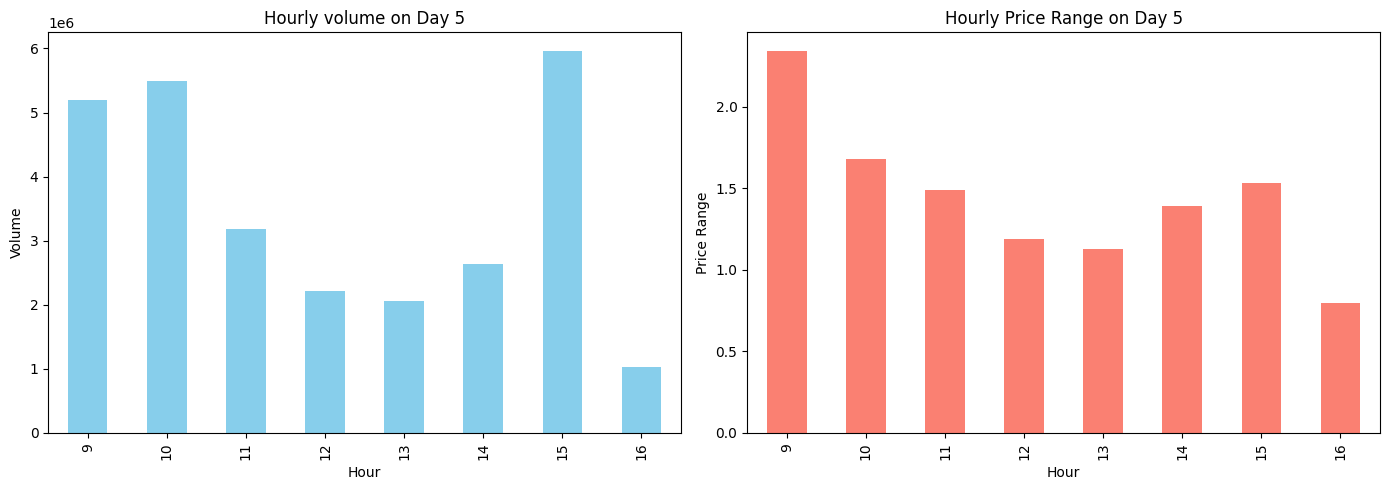


------------------------------------------------

Comparing summary statistics accross days:
Day 1 Summary:
                PRICE          SIZE
count  342068.000000  3.420680e+05
mean      457.230434  1.113355e+02
std         0.627741  2.343928e+03
min       455.010000  1.000000e+00
25%       456.850000  2.000000e+01
50%       457.300000  1.000000e+02
75%       457.680000  1.000000e+02
max       458.840000  1.347466e+06
Day 2 Summary:
                PRICE          SIZE
count  314071.000000  3.140710e+05
mean      264.302808  2.201456e+02
std         0.507244  2.652188e+03
min       263.140000  1.000000e+00
25%       263.900000  1.000000e+02
50%       264.270000  1.000000e+02
75%       264.670000  2.000000e+02
max       267.260000  1.439916e+06
Day 3 Summary:
                PRICE          SIZE
count  270851.000000  2.708510e+05
mean      266.171165  2.205162e+02
std         0.411743  3.359572e+03
min       264.800000  1.000000e+00
25%       265.930000  1.000000e+02
50%       266.1900

In [ ]:
# Initialize dictionary to store summary stats
summary_stats={}

for i,data in data_days.items():
    #Display initial info
    print(f'Summary for Day {i}')
    
    #Basic Descriptive Statistics
    stats=data[['PRICE', 'SIZE']].describe()
    summary_stats[i]=stats
    print(stats)
    
    #Total trading volume for the day
    total_volume=data['SIZE'].sum()
    print(f"Total Volume on Day {i}: {total_volume}")
    
    #Price range (high-low)
    price_range=data['PRICE'].max()-data['PRICE'].min()
    print(f"Price Range on Day {i}: {price_range}")      
    
    #Checking intraday trends by hour 
    data['Hour']=pd.to_datetime(data['Time']).dt.hour
    hourly_volume=data.groupby('Hour')['SIZE'].sum()
    hourly_price_range=data.groupby('Hour')['PRICE'].agg(lambda x: x.max()-x.min())
    
    #Plotting hourly volume and price range for visualization
    plt.figure(figsize=(14,5))
    
    #Plot 1: Hourly volume
    plt.subplot(1,2,1)
    hourly_volume.plot(kind='bar', color='skyblue')
    plt.title(f'Hourly volume on Day {i}')
    plt.xlabel('Hour')
    plt.ylabel('Volume')
    
    #Plot 2: Hourly Price Range
    plt.subplot(1, 2, 2)
    hourly_price_range.plot(kind='bar', color='salmon')
    plt.title(f'Hourly Price Range on Day {i}')
    plt.xlabel('Hour')
    plt.ylabel('Price Range')
    
    plt.tight_layout()
    plt.show()
    
    print("\n------------------------------------------------\n")
    
#Inter-day comparisons
print('Comparing summary statistics accross days:')
for day, stats in summary_stats.items():
    print(f"Day {day} Summary:\n", stats)

**Examining daily data summaries offers insights into trends and unusual trading patterns. Below is a breakdown of notable findings, highlighting potential implications for how closely or distantly these days may be spaced in time:**








1. Volume Analysis:
- Day 4 has an exceptionally high trading volume (271,802,390), significantly larger than other days. This could indicate a day with particularly high trading activity, possibly due to market-moving news or events.
- In contrast, Days 1, 3, and 5 have considerably lower volumes, with Day 5 showing the lowest (27,760,866). This could suggest that Day 5 is either less volatile or occurs on a typical trading day without significant events.
2. Price Range:
- Day 4 has an unusually wide price range of 20.68, which is much larger than the ranges on other days. This wide range and high volume could signal high volatility, possibly associated with external economic or market-specific events, earnings announcements, or geopolitical factors.
- Day 2 also has a relatively wide price range of 4.12, suggesting it was more volatile than Days 1, 3, and 5, which had ranges of 3.83, 2.57, and 2.34, respectively.
3. Price Levels and Observations on Time Proximity:
- The average price varies widely across the days. For instance, Day 1 averages around 457.23, which is relatively close to Day 5’s average of 442.08, suggesting that these two days might be closer in time. In contrast, Days 2 and 3 have averages near 264.30 and 266.17, respectively, indicating that they might be close together in time but are distinct from Days 1 and 5.
- Day 4, with a significantly lower average price of 236.87, suggests it may represent a more distant trading period compared to the others. The substantial differences in average price and range, along with its extreme volume, indicate that Day 4 likely reflects a trading day in a different market environment or could be associated with a major event.
4. Unusual Days:
- Day 4 stands out as unusual, with its large volume and price range, suggesting it could be either an event-driven day or a day in a different time period (e.g., a distant time in a lower-price market cycle).
- Day 2 also shows some elevated activity and range, but not to the extent of Day 4. It may represent a more active day, possibly around significant trading activity or a moderately impactful news cycle.



Finally, for the Hourly Volume and Hourly Price Range diagrams, one can assume:
- The hour with observed high activity in the stock market is at 3 p.m. (15:00), i.e., an hour before it closes, as both higher trading volume and increased volatility are noted during this time. The increased stock market activity around 3 p.m. (15:00) is driven by end-of-day positioning, as traders and institutional investors adjust their portfolios before the market closes. This period often sees profit-taking, as investors lock in gains or cut losses, leading to a surge in trading volume. Additionally, important economic reports and corporate announcements released in the afternoon can create volatility, while heightened liquidity as more traders become active amplifies price movements. Psychological factors also play a role, as sentiment shifts quickly during the last hour of trading.
- On the other hand, at 4 p.m. (16:00), lower trading volume and volatility are observed. The decline in trading volume and volatility at 4 p.m. (16:00) can be attributed to the fact that the market is closing, leading most traders to finalize their transactions before the end of the trading day. By this time, many investors have already made their last-minute trades, resulting in reduced activity. Additionally, as the closing bell approaches, uncertainty often increases, causing traders to refrain from entering new positions, especially if they want to avoid holding stocks overnight. Consequently, this leads to a decrease in both buying and selling activity, resulting in lower trading volume and volatility as the market concludes for the day.
- Overall, there are no other indications of repeated activity during a specific hour.

**PROJECT STEP 4**

In [3]:
import pandas as pd

day4=pd.read_csv("Day4_Trades_SPY.csv")

day4["Time"]=pd.to_datetime(day4["Time"])


C:\Users\HP\AppData\Local\Temp\ipykernel_13628\4064406903.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day4["Time"]=pd.to_datetime(day4["Time"])


In [23]:
# Add a minute column
day4["Minute"]=day4["Time"].dt.floor('T')#Floor to the nearest minute 
#day4["Minute"] = day4["Time"].dt.time  # Extract only the time component

# Calculate cumulative volume, volatility, and number of trades per minute
metrics=day4.groupby('Minute').agg(
    VOLUME=('SIZE', 'sum'),
    VOLATILITY=('PRICE', lambda x: x.pct_change().std()),
    NUM_TRADES=('PRICE', 'count')
).reset_index()

print(metrics) 

C:\Users\HP\AppData\Local\Temp\ipykernel_13628\26361890.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  day4["Minute"]=day4["Time"].dt.floor('T')#Floor to the nearest minute


                 Minute   VOLUME  VOLATILITY  NUM_TRADES
0   2024-11-22 09:30:00  2415972    0.000871       12993
1   2024-11-22 09:31:00  1620751    0.000889       12169
2   2024-11-22 09:32:00  1477235    0.000827       11760
3   2024-11-22 09:33:00  1387699    0.000815       11952
4   2024-11-22 09:34:00  1051070    0.000812       11460
..                  ...      ...         ...         ...
372 2024-11-22 15:56:00  3291039    0.000829       26422
373 2024-11-22 15:57:00  3435449    0.000823       22225
374 2024-11-22 15:58:00  3165541    0.000824       19772
375 2024-11-22 15:59:00  4353150    0.000827       20865
376 2024-11-22 16:00:00  2107160    0.001538          41

[377 rows x 4 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_13628\2571937207.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  all_minutes = pd.date_range(start=metrics['Minute'].min(), end=metrics['Minute'].max(), freq='T')


Missing minutes due to halt: ['12:57', '12:58', '12:59', '13:00', '13:01', '13:02', '13:03', '13:04', '13:05', '13:06', '13:07', '13:08', '13:09', '13:10']


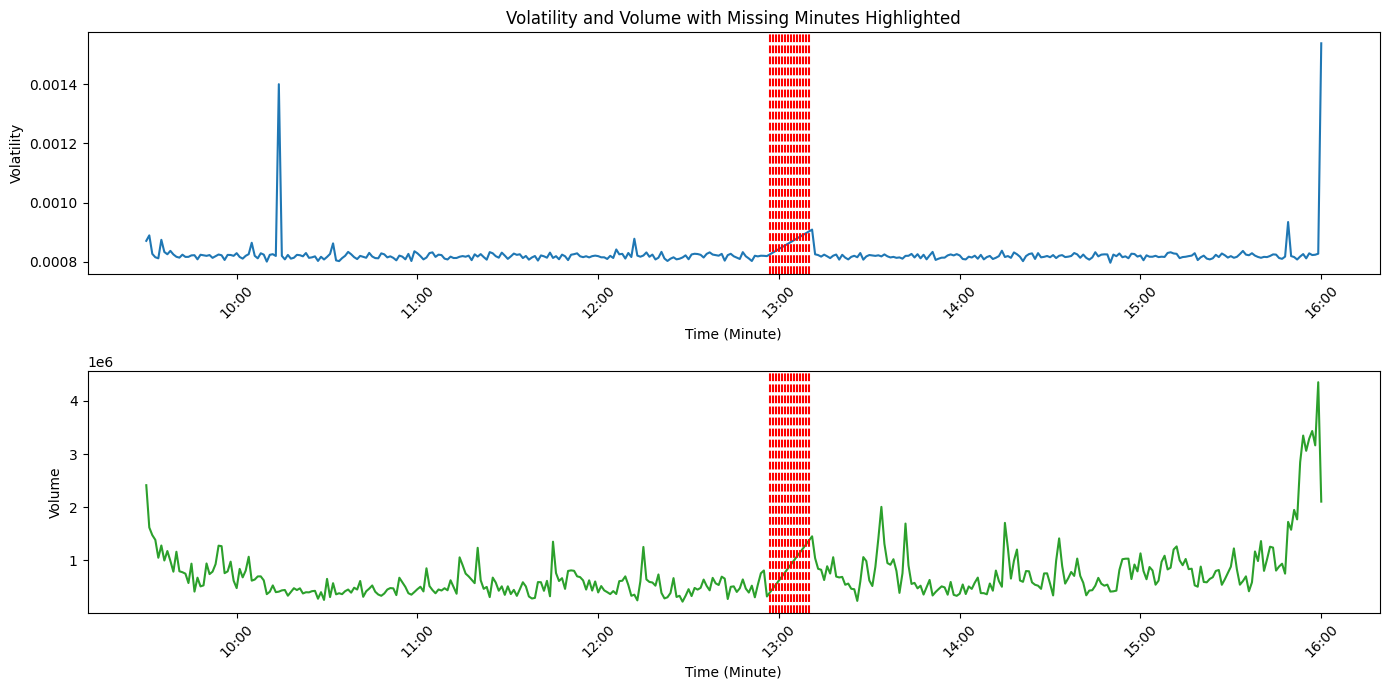

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter


# Identify missing minutes by checking the range of minutes in the data
all_minutes = pd.date_range(start=metrics['Minute'].min(), end=metrics['Minute'].max(), freq='T')
existing_minutes = metrics['Minute']
missing_minutes = list(set(all_minutes) - set(existing_minutes))
# Convert missing minutes to '%H:%M' format
missing_minutes_formatted = sorted([minute.strftime('%H:%M') for minute in missing_minutes])

# Print missing minutes
print("Missing minutes due to halt:", missing_minutes_formatted)

# Plotting the volatility and volume with respect to the minutes
plt.figure(figsize=(14, 7))

# Define the formatter for the x-axis to display only hours and minutes
time_formatter = DateFormatter('%H:%M')

# Plot Volatility
plt.subplot(2, 1, 1)
plt.plot(metrics['Minute'], metrics['VOLATILITY'], label='Volatility', color='tab:blue')
plt.title('Volatility and Volume with Missing Minutes Highlighted')
plt.xlabel('Time (Minute)')
plt.ylabel('Volatility')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)
# Highlight the missing minutes (market halt)
for minute in missing_minutes:
    plt.axvline(minute, color='red', linestyle='--', label=f'Missing Minute: {minute}')

# Plot Volume
plt.subplot(2, 1, 2)
plt.plot(metrics['Minute'], metrics['VOLUME'], label='Volume', color='tab:green')
plt.xlabel('Time (Minute)')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)

# Highlight the missing minutes (market halt)
for minute in missing_minutes:
    plt.axvline(minute, color='red', linestyle='--', label=f'Missing Minute: {minute}')

# Show the plot
plt.tight_layout()
plt.show()





In [68]:
# List of halt minutes
halt_minutes = ['12:57', '12:58', '12:59', '13:00', '13:01', '13:02', 
                '13:03', '13:04', '13:05', '13:06', '13:07', '13:08', 
                '13:09', '13:10']

# Convert halt minutes to datetime format
halt_minutes_dt = pd.to_datetime(halt_minutes, format='%H:%M')

# Format the 'Minute' column in metrics to '%H:%M'
metrics['Minute'] = pd.to_datetime(metrics['Minute']).dt.strftime('%H:%M')

# Find the first halt minute in formatted string
first_halt_minute = halt_minutes[0]  # '12:57'

# Filter rows strictly before the first halt minute
valid_data = metrics[metrics['Minute'] < first_halt_minute]

# Calculate mean volume and volatility until the minute before the halt
mean_volume = valid_data['VOLUME'].mean()
mean_volatility = valid_data['VOLATILITY'].mean()

# Display the results
print(f"Mean Volume until the minute before halt: {mean_volume}")
print(f"Mean Volatility until the minute before halt: {mean_volatility}")



Mean Volume until the minute before halt: 584014.2657004831
Mean Volatility until the minute before halt: 0.0008231813855038891


C:\Users\HP\AppData\Local\Temp\ipykernel_13628\3497732701.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metrics['Minute'] = pd.to_datetime(metrics['Minute']).dt.strftime('%H:%M')


In [36]:
import pandas as pd

# Load each file
day1_data = pd.read_csv('Day1_Trades_SPY.csv')
day2_data = pd.read_csv('Day2_Trades_SPY.csv')
#day3_data = pd.read_csv('Day3_Trades_SPY.csv')
#day5_data = pd.read_csv('Day5_Trades_SPY.csv')

# Convert the 'Time' column to datetime and floor to the nearest minute for each dataset
day1_data['Time'] = pd.to_datetime(day1_data['Time'])
day1_data['Minute'] = day1_data['Time'].dt.floor('T')

day2_data['Time'] = pd.to_datetime(day2_data['Time'])
day2_data['Minute'] = day2_data['Time'].dt.floor('T')

#day3_data['Time'] = pd.to_datetime(day3_data['Time'])
#day3_data['Minute'] = day3_data['Time'].dt.floor('T')

#day5_data['Time'] = pd.to_datetime(day5_data['Time'])
#day5_data['Minute'] = day5_data['Time'].dt.floor('T')





C:\Users\HP\AppData\Local\Temp\ipykernel_13628\4225608587.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day1_data['Time'] = pd.to_datetime(day1_data['Time'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13628\4225608587.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  day1_data['Minute'] = day1_data['Time'].dt.floor('T')
C:\Users\HP\AppData\Local\Temp\ipykernel_13628\4225608587.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day2_data['Time'] = pd.to_datetime(day2_data['Time'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13628\4225608587.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  da

    Formatted_Minute
0              09:30
1              09:31
2              09:32
3              09:33
4              09:34
..               ...
387            15:56
388            15:57
389            15:58
390            15:59
391            16:00

[392 rows x 1 columns]
Duplicate minutes:
   Formatted_Minute
53            10:23
54            10:23


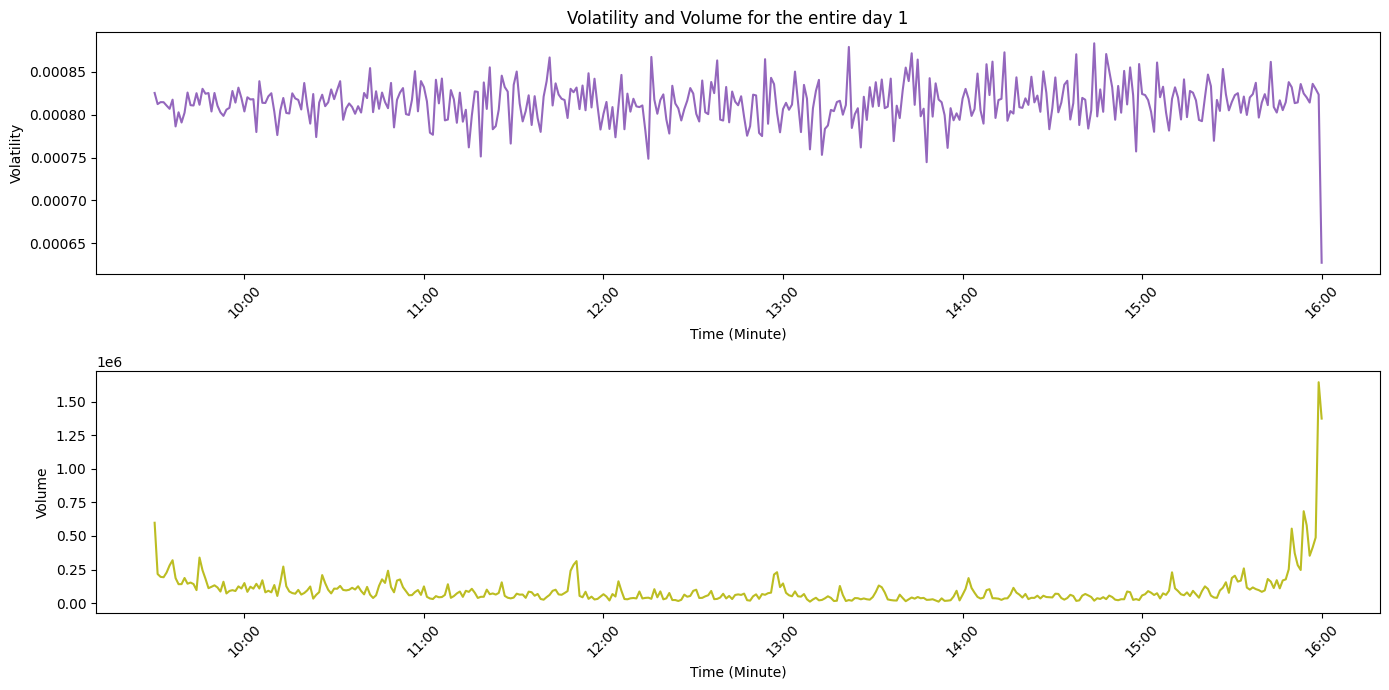

                 Minute   VOLUME  VOLATILITY  NUM_TRADES
0   2024-11-23 09:30:00   584369    0.000812        1674
1   2024-11-23 09:31:00   398025    0.000813        2113
2   2024-11-23 09:32:00   400857    0.000826        1802
3   2024-11-23 09:33:00   484555    0.000826        2591
4   2024-11-23 09:34:00   435856    0.000821        1931
..                  ...      ...         ...         ...
386 2024-11-23 15:56:00   390190    0.000819        2138
387 2024-11-23 15:57:00   356373    0.000818        1818
388 2024-11-23 15:58:00   577123    0.000820        2786
389 2024-11-23 15:59:00  1678163    0.000807        6469
390 2024-11-23 16:00:00  1457430    0.000829          41

[391 rows x 4 columns]


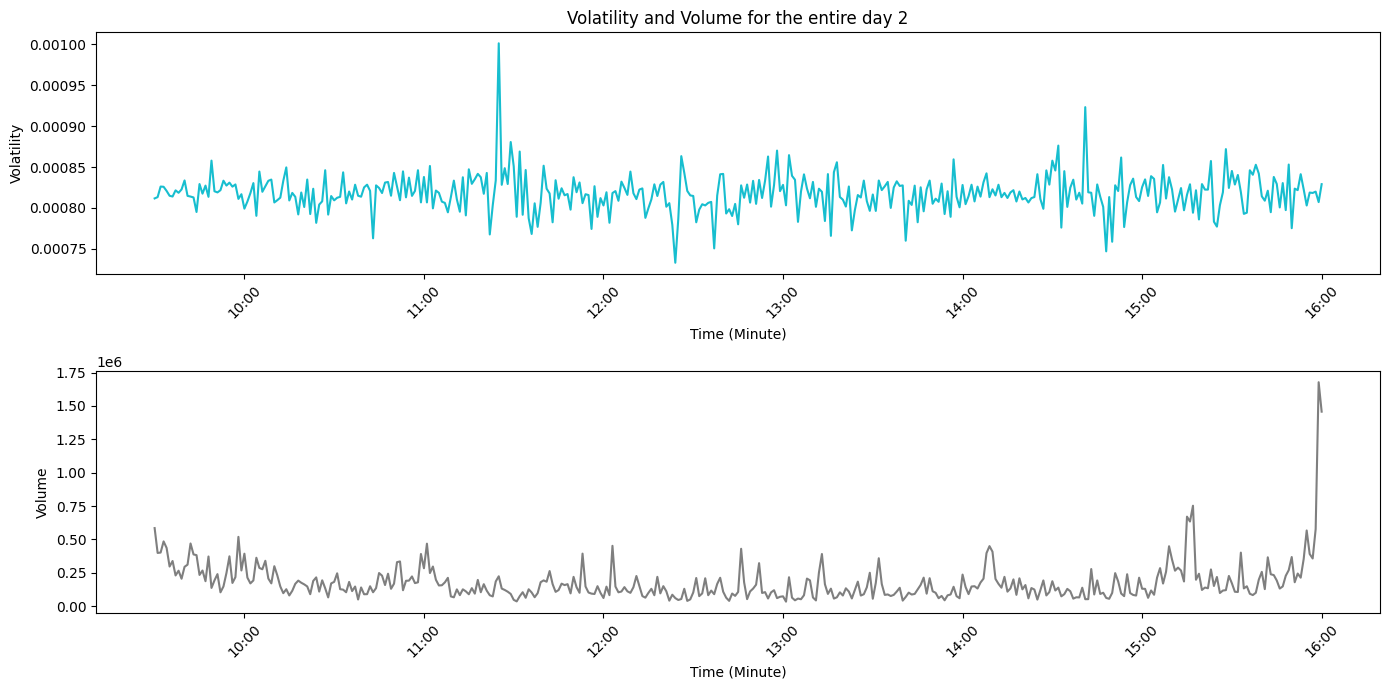

In [58]:

# Group by 'Minute' and calculate cumulative metrics for day 1
daily_stats_day1 = day1_data.groupby('Minute').agg(
    VOLUME=('SIZE', 'sum'),
    VOLATILITY=('PRICE', lambda x: x.pct_change().std()),
    NUM_TRADES=('PRICE', 'count')
).reset_index()


# Format 'Minute' to '%H:%M'
daily_stats_day1['Formatted_Minute'] = daily_stats_day1['Minute'].dt.strftime('%H:%M')

# Print the formatted 'Minute' column to check the data
print(daily_stats_day1[['Formatted_Minute']])

# Check for duplicates in the 'Minute' column
duplicates = daily_stats_day1[daily_stats_day1.duplicated('Formatted_Minute', keep=False)]

# Display the duplicates
print("Duplicate minutes:")
print(duplicates[['Formatted_Minute']])

# Drop duplicates based on 'Formatted_Minute', keeping only the first occurrence
daily_stats_day1 = daily_stats_day1.drop_duplicates(subset='Formatted_Minute', keep='first')

# Ensure 'Minute' is in datetime format for better plotting
daily_stats_day1['Minute'] = pd.to_datetime(daily_stats_day1['Formatted_Minute'], format='%H:%M')

# Plotting the volatility and volume with respect to the minutes
plt.figure(figsize=(14, 7))

# Define the formatter for the x-axis to display only hours and minutes
time_formatter = DateFormatter('%H:%M')

# Plot Volatility
plt.subplot(2, 1, 1)
plt.plot(daily_stats_day1['Minute'], daily_stats_day1['VOLATILITY'], label='Volatility', color='tab:purple')
plt.title('Volatility and Volume for the entire day 1')
plt.xlabel('Time (Minute)')
plt.ylabel('Volatility')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)

# Plot Volume
plt.subplot(2, 1, 2)
plt.plot(daily_stats_day1['Minute'], daily_stats_day1['VOLUME'], label='Volume', color='tab:olive')
plt.xlabel('Time (Minute)')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Group by 'Minute' and calculate cumulative metrics for day 2
daily_stats_day2 = day2_data.groupby('Minute').agg(
    VOLUME=('SIZE', 'sum'),
    VOLATILITY=('PRICE', lambda x: x.pct_change().std()),
    NUM_TRADES=('PRICE', 'count')
).reset_index()

print(daily_stats_day2)

# Plotting the volatility and volume with respect to the minutes
plt.figure(figsize=(14, 7))

# Define the formatter for the x-axis to display only hours and minutes
time_formatter = DateFormatter('%H:%M')

# Plot Volatility
plt.subplot(2, 1, 1)
plt.plot(daily_stats_day2['Minute'],daily_stats_day2['VOLATILITY'], label='Volatility', color='tab:cyan')
plt.title('Volatility and Volume for the entire day 2')
plt.xlabel('Time (Minute)')
plt.ylabel('Volatility')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)

# Plot Volume
plt.subplot(2, 1, 2)
plt.plot(daily_stats_day2['Minute'], daily_stats_day2['VOLUME'], label='Volume', color='tab:gray')
plt.xlabel('Time (Minute)')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_formatter(time_formatter)  # Apply formatter to x-axis
plt.xticks(rotation=45)


# Show the plot
plt.tight_layout()
plt.show()


In [69]:
# Compare differnce in mean volume and volatility at halted day (day4) vs day1 and day2 until the same minute 

# List of halt minutes
halt_minutes = ['12:57', '12:58', '12:59', '13:00', '13:01', '13:02', 
                '13:03', '13:04', '13:05', '13:06', '13:07', '13:08', 
                '13:09', '13:10']

# Convert halt minutes to datetime format
halt_minutes_dt = pd.to_datetime(halt_minutes, format='%H:%M')

# Format the 'Minute' column in metrics to '%H:%M'
daily_stats_day1['Minute'] = pd.to_datetime(daily_stats_day1['Minute']).dt.strftime('%H:%M')

# Find the first halt minute in formatted string
first_halt_minute = halt_minutes[0]  # '12:57'

# Filter rows strictly before the first halt minute
valid_data_day1 = daily_stats_day1[daily_stats_day1['Minute'] < first_halt_minute]

mean_volume_day1 = valid_data_day1['VOLUME'].mean()
mean_volatility_day1 = valid_data_day1['VOLATILITY'].mean()

print(f"Mean Volume for Day 1 until minute of halt: {mean_volume_day1}")
print(f"Mean Volatility for Day 1 until minute of halt: {mean_volatility_day1}")

# Format the 'Minute' column in metrics to '%H:%M'
daily_stats_day2['Minute'] = pd.to_datetime(daily_stats_day2['Minute']).dt.strftime('%H:%M')

# Find the first halt minute in formatted string
first_halt_minute = halt_minutes[0]  # '12:57'

# Filter rows strictly before the first halt minute
valid_data_day2 = daily_stats_day2[daily_stats_day2['Minute'] < first_halt_minute]

mean_volume_day2 = valid_data_day2['VOLUME'].mean()
mean_volatility_day2 = valid_data_day2['VOLATILITY'].mean()

# Display the results
print(f"Mean Volume for Day 2 until minute before halt: {mean_volume_day2}")
print(f"Mean Volatility for Day 2 until minute before halt: {mean_volatility_day2}")



Mean Volume for Day 1 until minute of halt: 93241.46859903382
Mean Volatility for Day 1 until minute of halt: 0.0008127856993779905
Mean Volume for Day 2 until minute before halt: 173236.13043478262
Mean Volatility for Day 2 until minute before halt: 0.0008177160234604354


C:\Users\HP\AppData\Local\Temp\ipykernel_13628\908838408.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_stats_day1['Minute'] = pd.to_datetime(daily_stats_day1['Minute']).dt.strftime('%H:%M')
C:\Users\HP\AppData\Local\Temp\ipykernel_13628\908838408.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_stats_day2['Minute'] = pd.to_datetime(daily_stats_day2['Minute']).dt.strftime('%H:%M')


In [70]:
# Find the differences between Day 4 and the other days
diff_volume_day4_day1 = mean_volume - mean_volume_day1
diff_volatility_day4_day1 = mean_volatility- mean_volatility_day1

diff_volume_day4_day2 = mean_volume - mean_volume_day2
diff_volatility_day4_day2 = mean_volatility - mean_volatility_day2

# Print the differences
print(f"Difference in Mean Volume between Day 4 and Day 1: {diff_volume_day4_day1}")
print(f"Difference in Mean Volatility between Day 4 and Day 1: {diff_volatility_day4_day1}")
print(f"Difference in Mean Volume between Day 4 and Day 2: {diff_volume_day4_day2}")
print(f"Difference in Mean Volatility between Day 4 and Day 2: {diff_volatility_day4_day2}")

Difference in Mean Volume between Day 4 and Day 1: 490772.7971014493
Difference in Mean Volatility between Day 4 and Day 1: 1.0395686125898567e-05
Difference in Mean Volume between Day 4 and Day 2: 410778.1352657005
Difference in Mean Volatility between Day 4 and Day 2: 5.465362043453664e-06


The results from the differences in mean volume and volatility between Day 4 (the day when the stock market experienced heightened volatility, likely due to coronavirus crisis concerns) and Days 1 and 2 suggest several important market behaviors:

## 1.Difference in Mean Volume: ##
- Interpretation:
The sharp increase in trading volume on Day 4 compared to both Day 1 and Day 2 aligns with the triggering of a market-wide circuit breaker on March 18, 2020, due to significant sell-offs. This increase in volume likely reflects a surge in panic selling and market volatility as investors reacted to concerns about the pandemic and its economic impact. The heightened volume indicates that more market participants were involved in trading as the market faced significant turbulence.

## 2. Difference in Mean Volatility: ##
- Interpretation: Even though the difference in mean volatility between Day 4 and the previous days is small, it is still meaningful. In times of crisis, even small increases in volatility can indicate a shift in market behavior, and the triggering of the circuit breaker highlights that the market was reacting in a way that was markedly different from earlier in the crisis. The small difference is important because it reflects the market's increasing nervousness and uncertainty, factors that play a critical role during periods of financial instability like the coronavirus crisis.
## Conclusion in Context of the Event: ##
- The rise in both volume and volatility on Day 4 suggests that investor sentiment was extremely negative and uncertain, leading to more frantic trading and larger price swings. This corresponds with the market's reaction to the pandemic and the fear that government actions would not be sufficient to contain the economic damage.
- The fact that a circuit breaker was triggered on Day 4 supports this interpretation, as it indicates that market movements were extreme enough to require temporary halts to allow the market to stabilize.
